In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./Datasets/Agriculture/Agriculture Overall.csv')

In [3]:
df.head()

,Quarterly Year,Total Agricultural Production (in million tonnes),Total Agricultural Revenues (in billion INR),Employment (in million people),GDP Contribution Percentage from Agriculture
0,2003-Q1,92.17,"1,610.20",54.2,18.4
1,2003-Q2,94.55,"1,646.80",54.3,18.2
2,2003-Q3,81.16,"1,485.00",54.4,17.9
3,2003-Q4,86.77,"1,561.10",54.5,18.1
4,2004-Q1,95.21,"1,697.50",54.6,18.3


In [4]:
df['Quarterly Year'] = pd.to_datetime(df['Quarterly Year'])

In [5]:
for i in range(1, 5):
    if df.iloc[:, i].dtype == 'object':
        df.iloc[:, i] = df.iloc[:, i].str.replace(',', '')
    df.iloc[:, i] = df.iloc[:, i].astype(float)
df.set_index('Quarterly Year', inplace=True)

In [6]:
df.head()

,Total Agricultural Production (in million tonnes),Total Agricultural Revenues (in billion INR),Employment (in million people),GDP Contribution Percentage from Agriculture
Quarterly Year,,,,
2003-01-01,92.17,1610.2,54.2,18.4
2003-04-01,94.55,1646.8,54.3,18.2
2003-07-01,81.16,1485.0,54.4,17.9
2003-10-01,86.77,1561.1,54.5,18.1
2004-01-01,95.21,1697.5,54.6,18.3


In [7]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt

In [18]:
from statsmodels.tsa.stattools import adfuller, kpss

def stationarity_tests(timeseries):
    # Perform ADF test
    result_adf = adfuller(timeseries, autolag='AIC')
    adf_statistic = result_adf[0]
    adf_pvalue = result_adf[1]

    # Perform KPSS test
    result_kpss = kpss(timeseries, regression='c', nlags='auto')
    kpss_statistic = result_kpss[0]
    kpss_pvalue = result_kpss[1]

    # Display results
    print("ADF Statistic:", adf_statistic)
    print("ADF p-value:", adf_pvalue)
    print("KPSS Statistic:", kpss_statistic)
    print("KPSS p-value:", kpss_pvalue)

    # Compare p-values with alpha
    if adf_pvalue <= 0.05 and kpss_pvalue > 0.05:
        print("The time series is likely stationary according to the ADF test.")
    elif adf_pvalue > 0.05 and kpss_pvalue <= 0.05:
        print("The time series is likely stationary according to the KPSS test.")
    elif adf_pvalue <= 0.05 and kpss_pvalue <= 0.05:
        print("The time series is likely stationary.")
    else:
        print("The time series is likely non-stationary.")

    # Recommend differencing if needed
    if adf_pvalue > 0.05:
        print("Differencing may be needed to achieve stationarity based on the ADF test.")
    elif kpss_pvalue > 0.05:
        print("Differencing may be needed to achieve stationarity based on the KPSS test.")

# Example usage
# Assuming df is your DataFrame and 'Total Agricultural Production (in million tonnes)' is the column
stationarity_tests(df['Total Agricultural Production (in million tonnes)'])

ADF Statistic: -1.9700521993571112
ADF p-value: 0.2998565282844685
KPSS Statistic: 1.0446690687239404
KPSS p-value: 0.01
The time series is likely stationary according to the KPSS test.
Differencing may be needed to achieve stationarity based on the ADF test.


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [15]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def stationarity_tests(timeseries):
    # Perform ADF test for trend stationarity
    result_adf_trend = adfuller(timeseries, autolag='AIC')
    adf_pvalue_trend = result_adf_trend[1]

    # Differencing for trend stationarity
    num_diff_trend = 0
    while adf_pvalue_trend > 0.05:
        timeseries = timeseries.diff().dropna()
        result_adf_trend = adfuller(timeseries, autolag='AIC')
        adf_pvalue_trend = result_adf_trend[1]
        num_diff_trend += 1

    # # Perform ADF test for seasonality stationarity
    # result_adf_seasonal = adfuller(timeseries.diff().dropna(), autolag='AIC')
    # adf_pvalue_seasonal = result_adf_seasonal[1]

    # # Differencing for seasonality stationarity
    # num_diff_seasonal = 0
    # while adf_pvalue_seasonal > 0.05:
    #     timeseries = timeseries.diff().dropna()
    #     result_adf_seasonal = adfuller(timeseries.diff().dropna(), autolag='AIC')
    #     adf_pvalue_seasonal = result_adf_seasonal[1]
    #     num_diff_seasonal += 1

    return num_diff_trend

# Example usage
# Assuming df is your DataFrame and 'Total Agricultural Production (in million tonnes)' is the column
trend_diff = stationarity_tests(df[df.columns[0]])


In [16]:
trend_diff

2

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


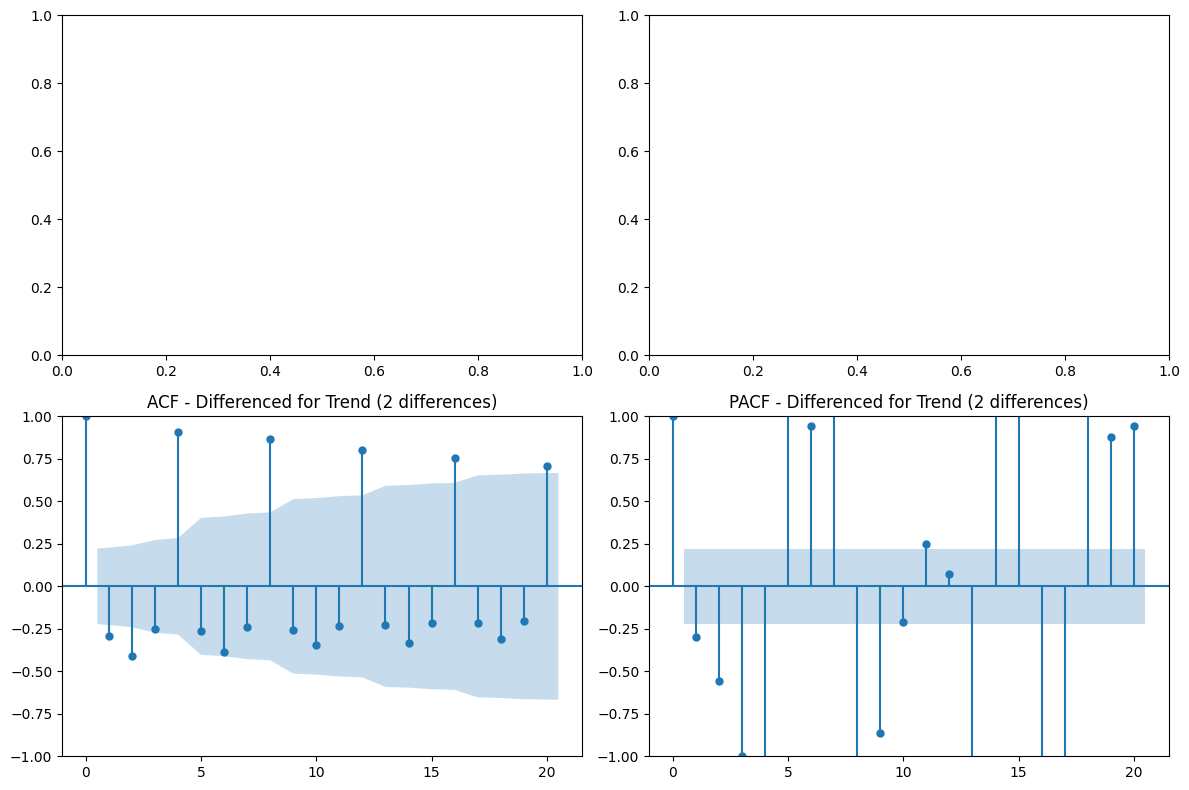

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def stationarity_tests(timeseries):
    # Perform ADF test for trend stationarity
    result_adf_trend = adfuller(timeseries, autolag='AIC')
    adf_pvalue_trend = result_adf_trend[1]

    # Differencing for trend stationarity
    num_diff_trend = 0
    while adf_pvalue_trend > 0.05:
        timeseries = timeseries.diff().dropna()
        result_adf_trend = adfuller(timeseries, autolag='AIC')
        adf_pvalue_trend = result_adf_trend[1]
        num_diff_trend += 1

    # # Perform ADF test for seasonality stationarity
    # result_adf_seasonal = adfuller(timeseries.diff().dropna(), autolag='AIC')
    # adf_pvalue_seasonal = result_adf_seasonal[1]

    # # Differencing for seasonality stationarity
    # num_diff_seasonal = 0
    # while adf_pvalue_seasonal > 0.05:
    #     timeseries = timeseries.diff().dropna()
    #     result_adf_seasonal = adfuller(timeseries.diff().dropna(), autolag='AIC')
    #     adf_pvalue_seasonal = result_adf_seasonal[1]
    #     num_diff_seasonal += 1

    return timeseries, num_diff_trend #num_diff_seasonal

# Example usage
# Assuming df is your DataFrame and 'Total Agricultural Production (in million tonnes)' is the column
timeseries, trend_diff = stationarity_tests(df[df.columns[0]])

# Plot ACF and PACF
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Differenced for trend stationarity
plot_acf(timeseries, lags=20, ax=ax[1, 0])
plot_pacf(timeseries, lags=20, ax=ax[1, 1])
ax[1, 0].set_title(f'ACF - Differenced for Trend ({trend_diff} differences)')
ax[1, 1].set_title(f'PACF - Differenced for Trend ({trend_diff} differences)')

plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


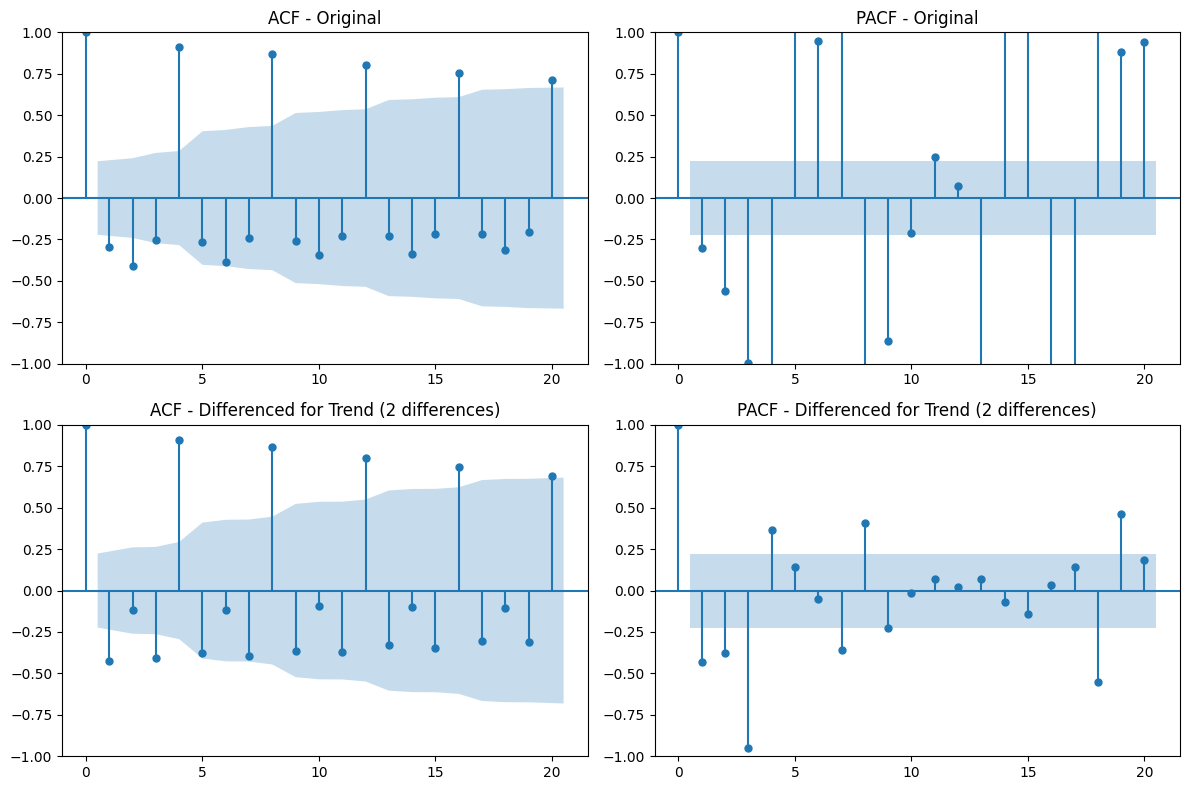

AttributeError: 'Figure' object has no attribute 'significant_lags'

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def stationarity_tests(timeseries):
    # Perform ADF test for trend stationarity
    result_adf_trend = adfuller(timeseries, autolag='AIC')
    adf_pvalue_trend = result_adf_trend[1]

    # Differencing for trend stationarity
    num_diff_trend = 0
    while adf_pvalue_trend > 0.05:
        timeseries = timeseries.diff().dropna()
        result_adf_trend = adfuller(timeseries, autolag='AIC')
        adf_pvalue_trend = result_adf_trend[1]
        num_diff_trend += 1

    # Perform ADF test for seasonality stationarity
    result_adf_seasonal = adfuller(timeseries.diff().dropna(), autolag='AIC')
    adf_pvalue_seasonal = result_adf_seasonal[1]

    # Differencing for seasonality stationarity
    num_diff_seasonal = 0
    while adf_pvalue_seasonal > 0.05:
        timeseries = timeseries.diff().dropna()
        result_adf_seasonal = adfuller(timeseries.diff().dropna(), autolag='AIC')
        adf_pvalue_seasonal = result_adf_seasonal[1]
        num_diff_seasonal += 1

    return timeseries, num_diff_trend, num_diff_seasonal

def print_acf_pacf_lags(timeseries, trend_diff, seasonal_diff):
    # Plot ACF and PACF
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))

    # Original time series
    acf_orig = plot_acf(timeseries, lags=20, ax=ax[0, 0])
    pacf_orig = plot_pacf(timeseries, lags=20, ax=ax[0, 1])
    ax[0, 0].set_title('ACF - Original')
    ax[0, 1].set_title('PACF - Original')

    # Differenced for trend stationarity
    acf_diff_trend = plot_acf(timeseries.diff().dropna(), lags=20, ax=ax[1, 0])
    pacf_diff_trend = plot_pacf(timeseries.diff().dropna(), lags=20, ax=ax[1, 1])
    ax[1, 0].set_title(f'ACF - Differenced for Trend ({trend_diff} differences)')
    ax[1, 1].set_title(f'PACF - Differenced for Trend ({trend_diff} differences)')

    plt.tight_layout()
    plt.show()

    # Print significant lags
    print("ACF Original Significant Lags:", acf_orig.significant_lags)
    print("PACF Original Significant Lags:", pacf_orig.significant_lags)
    print("ACF Diff Trend Significant Lags:", acf_diff_trend.significant_lags)
    print("PACF Diff Trend Significant Lags:", pacf_diff_trend.significant_lags)

# Example usage
# Assuming df is your DataFrame and 'Total Agricultural Production (in million tonnes)' is the column
timeseries, trend_diff, seasonal_diff = stationarity_tests(df['Total Agricultural Production (in million tonnes)'])
print_acf_pacf_lags(timeseries, trend_diff, seasonal_diff)


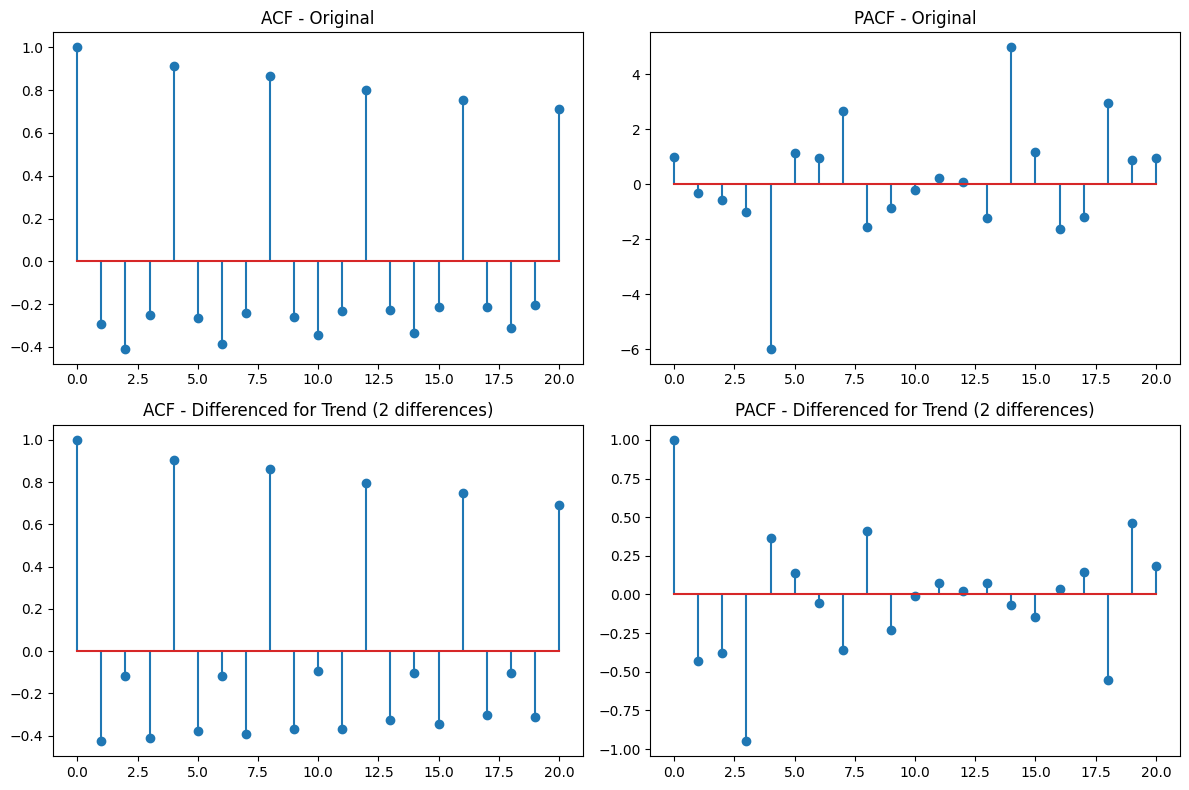

ACF Original Significant Lags: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
PACF Original Significant Lags: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
ACF Diff Trend Significant Lags: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
PACF Diff Trend Significant Lags: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 17, 18, 19, 20]


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf

def stationarity_tests(timeseries):
    # Perform ADF test for trend stationarity
    result_adf_trend = adfuller(timeseries, autolag='AIC')
    adf_pvalue_trend = result_adf_trend[1]

    # Differencing for trend stationarity
    num_diff_trend = 0
    while adf_pvalue_trend > 0.05:
        timeseries = timeseries.diff().dropna()
        result_adf_trend = adfuller(timeseries, autolag='AIC')
        adf_pvalue_trend = result_adf_trend[1]
        num_diff_trend += 1

    # Perform ADF test for seasonality stationarity
    result_adf_seasonal = adfuller(timeseries.diff().dropna(), autolag='AIC')
    adf_pvalue_seasonal = result_adf_seasonal[1]

    # Differencing for seasonality stationarity
    num_diff_seasonal = 0
    while adf_pvalue_seasonal > 0.05:
        timeseries = timeseries.diff().dropna()
        result_adf_seasonal = adfuller(timeseries.diff().dropna(), autolag='AIC')
        adf_pvalue_seasonal = result_adf_seasonal[1]
        num_diff_seasonal += 1

    return timeseries, num_diff_trend, num_diff_seasonal

def print_acf_pacf_lags(timeseries, trend_diff, seasonal_diff):
    # Plot ACF and PACF
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))

    # Original time series
    acf_orig = acf(timeseries, fft=True, nlags=20)
    pacf_orig = pacf(timeseries, nlags=20)
    ax[0, 0].stem(acf_orig)
    ax[0, 1].stem(pacf_orig)
    ax[0, 0].set_title('ACF - Original')
    ax[0, 1].set_title('PACF - Original')

    # Differenced for trend stationarity
    acf_diff_trend = acf(timeseries.diff().dropna(), fft=True, nlags=20)
    pacf_diff_trend = pacf(timeseries.diff().dropna(), nlags=20)
    ax[1, 0].stem(acf_diff_trend)
    ax[1, 1].stem(pacf_diff_trend)
    ax[1, 0].set_title(f'ACF - Differenced for Trend ({trend_diff} differences)')
    ax[1, 1].set_title(f'PACF - Differenced for Trend ({trend_diff} differences)')

    plt.tight_layout()
    plt.show()

    # Print significant lags
    print("ACF Original Significant Lags:", [i for i, val in enumerate(acf_orig) if abs(val) > 1.96/len(timeseries)])
    print("PACF Original Significant Lags:", [i for i, val in enumerate(pacf_orig) if abs(val) > 1.96/len(timeseries)])
    print("ACF Diff Trend Significant Lags:", [i for i, val in enumerate(acf_diff_trend) if abs(val) > 1.96/len(timeseries)])
    print("PACF Diff Trend Significant Lags:", [i for i, val in enumerate(pacf_diff_trend) if abs(val) > 1.96/len(timeseries)])

# Example usage
# Assuming df is your DataFrame and 'Total Agricultural Production (in million tonnes)' is the column
timeseries, trend_diff, seasonal_diff = stationarity_tests(df['Total Agricultural Production (in million tonnes)'])
print_acf_pacf_lags(timeseries, trend_diff, seasonal_diff)




In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf

def stationarity_tests(timeseries):
    # Perform ADF test for trend stationarity
    result_adf_trend = adfuller(timeseries, autolag='AIC')
    adf_pvalue_trend = result_adf_trend[1]

    # Differencing for trend stationarity
    num_diff_trend = 0
    while adf_pvalue_trend > 0.05:
        timeseries = timeseries.diff().dropna()
        result_adf_trend = adfuller(timeseries, autolag='AIC')
        adf_pvalue_trend = result_adf_trend[1]
        num_diff_trend += 1

    # # Perform ADF test for seasonality stationarity
    # result_adf_seasonal = adfuller(timeseries.diff().dropna(), autolag='AIC')
    # adf_pvalue_seasonal = result_adf_seasonal[1]

    # # Differencing for seasonality stationarity
    # num_diff_seasonal = 0
    # while adf_pvalue_seasonal > 0.05:
    #     timeseries = timeseries.diff().dropna()
    #     result_adf_seasonal = adfuller(timeseries.diff().dropna(), autolag='AIC')
    #     adf_pvalue_seasonal = result_adf_seasonal[1]
    #     num_diff_seasonal += 1

    return timeseries, num_diff_trend #, num_diff_seasonal

def print_acf_pacf_lags(timeseries, trend_diff):
    # Plot ACF and PACF
    # fig, ax = plt.subplots(2, 2, figsize=(12, 8))

    # # Original time series
    acf_orig = acf(timeseries, fft=True, nlags=20)
    pacf_orig = pacf(timeseries, nlags=20)
    # ax[0, 0].stem(acf_orig)
    # ax[0, 1].stem(pacf_orig)
    # ax[0, 0].set_title('ACF - Original')
    # ax[0, 1].set_title('PACF - Original')

    # # Differenced for trend stationarity
    acf_diff_trend = acf(timeseries.diff().dropna(), fft=True, nlags=20)
    pacf_diff_trend = pacf(timeseries.diff().dropna(), nlags=20)
    # ax[1, 0].stem(acf_diff_trend)
    # ax[1, 1].stem(pacf_diff_trend)
    # ax[1, 0].set_title(f'ACF - Differenced for Trend ({trend_diff} differences)')
    # ax[1, 1].set_title(f'PACF - Differenced for Trend ({trend_diff} differences)')

    # plt.tight_layout()
    # plt.show()

    # # Print significant lags
    def find_significant_lags(acf_values):
        conf_interval = 1.96 / len(timeseries)**0.5
        return [i for i, val in enumerate(acf_values) if abs(val) > conf_interval]

    # print("ACF Original Significant Lags:", find_significant_lags(acf_orig))
    # print("PACF Original Significant Lags:", find_significant_lags(pacf_orig))
    # print("ACF Diff Trend Significant Lags:", find_significant_lags(acf_diff_trend))
    # print("PACF Diff Trend Significant Lags:", find_significant_lags(pacf_diff_trend))

    return [find_significant_lags(acf_orig), find_significant_lags(pacf_orig), find_significant_lags(acf_diff_trend), find_significant_lags(pacf_diff_trend)]

# Assuming df is your DataFrame and 'Total Agricultural Production (in million tonnes)' is the column
timeseries, trend_diff = stationarity_tests(df[df.columns[1]]) #, seasonal_diff
lags_data = print_acf_pacf_lags(timeseries, trend_diff)


In [65]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA


def stationarity_tests(timeseries):
    result_adf_trend = adfuller(timeseries, autolag='AIC')
    adf_pvalue_trend = result_adf_trend[1]

    num_diff_trend = 0
    while adf_pvalue_trend > 0.05:
        timeseries = timeseries.diff().dropna()
        result_adf_trend = adfuller(timeseries, autolag='AIC')
        adf_pvalue_trend = result_adf_trend[1]
        num_diff_trend += 1

    return timeseries, num_diff_trend

def print_acf_pacf_lags(timeseries, trend_diff):
    acf_orig = acf(timeseries, fft=True, nlags=20)
    pacf_orig = pacf(timeseries, nlags=20)

    acf_diff_trend = acf(timeseries.diff().dropna(), fft=True, nlags=20)
    pacf_diff_trend = pacf(timeseries.diff().dropna(), nlags=20)

    def find_significant_lags(acf_values):
        conf_interval = 1.96 / len(timeseries)**0.5
        return [i for i, val in enumerate(acf_values) if abs(val) > conf_interval]

    return [find_significant_lags(acf_orig), find_significant_lags(pacf_orig), find_significant_lags(acf_diff_trend), find_significant_lags(pacf_diff_trend)]

timeseries, trend_diff = stationarity_tests(df[df.columns[1]]) #, seasonal_diff
lags_data = print_acf_pacf_lags(timeseries, trend_diff)

P = []
Q = []
if trend_diff!=0:
    P = lags_data[3]
    Q = lags_data[2]
else:
    P = lags_data[1]
    Q = lags_data[0]

if 0 in P:
    P.remove(0)

if 0 in Q:
    Q.remove(0)

def getPDQ(my_list):
    break_index = next((i for i, (a, b) in enumerate(zip(my_list, my_list[1:]), start=1) if b != a + 1), None)
    if break_index is not None:
        return len(my_list[:break_index])
    else:
        return 0
    
p = getPDQ(P)
q = getPDQ(Q)
d = trend_diff

new_df = pd.DataFrame({df.columns[1]: df.iloc[:, 1].values}, index=df.index)

train_size = int(0.6 * len(new_df))
train_df, test_df = new_df[:train_size], df[train_size:]

arima_model = ARIMA(train_df[train_df.columns[0]], order=(p, d,q)).fit()

In [66]:
lags_data

[[0, 2, 4, 6, 8, 10, 12, 14, 16, 18],
 [0, 2, 4],
 [0, 1, 2, 4, 6, 8, 10, 12, 14, 16, 18],
 [0, 1, 2, 3, 4, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

In [50]:
if 0 in P:
    P.remove(0)

if 0 in Q:
    Q.remove(0)
P

[1, 2, 3, 4, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [52]:
def getPDQ(my_list):
    break_index = next((i for i, (a, b) in enumerate(zip(my_list, my_list[1:]), start=1) if b != a + 1), None)
    if break_index is not None:
        return len(my_list[:break_index])
    else:
        return 0
getPDQ(P)

4


In [53]:
new_df = pd.DataFrame({df.columns[1]: df.iloc[:, 1].values}, index=df.index)

print(new_df)

                Total Agricultural Revenues (in billion INR)
Quarterly Year                                              
2003-01-01                                            1610.2
2003-04-01                                            1646.8
2003-07-01                                            1485.0
2003-10-01                                            1561.1
2004-01-01                                            1697.5
...                                                      ...
2021-10-01                                            7528.2
2022-01-01                                            8270.9
2022-04-01                                            8568.2
2022-07-01                                            7118.1
2022-10-01                                            7613.1

[80 rows x 1 columns]


In [54]:
train_size = int(0.6 * len(new_df))
train_df, test_df = new_df[:train_size], df[train_size:]

In [16]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [61]:
arima_model = ARIMA(train_df[train_df.columns[0]], order=(4, 1, 2)).fit()

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra

In [62]:
future_predictions = arima_model.forecast(3)

In [60]:
trend_diff

1

In [63]:
future_predictions

2015-01-01    2580.047418
2015-04-01    2698.913350
2015-07-01    2300.889175
Freq: QS-OCT, Name: predicted_mean, dtype: float64

In [64]:
from sklearn.metrics import mean_squared_error

arima_predictions = arima_model.predict(start=len(train_df), end=len(df) - 1, typ='levels')

arima_mse = mean_squared_error(test_df[test_df.columns[0]], arima_predictions)

print(f"ARIMA MSE: {arima_mse}")


ARIMA MSE: 7155888.503270988


In [149]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt 


class ARIMAModel:
    def __init__(self, file, column_index):
        self.dataframe = self.process_dataset(file)
        self.column_index = column_index

    def process_dataset(self, file):
        df = pd.read_csv(file)
        df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])
        for i in range(1, 5):
            if df.iloc[:, i].dtype == 'object':
                df.iloc[:, i] = df.iloc[:, i].str.replace(',', '')
            df.iloc[:, i] = df.iloc[:, i].astype(float)
        df.set_index(df.columns[0], inplace=True)
        return df

    def stationarity_tests(self, timeseries):
        result_adf_trend = adfuller(timeseries, autolag='AIC')
        adf_pvalue_trend = result_adf_trend[1]

        num_diff_trend = 0
        while adf_pvalue_trend > 0.05:
            timeseries = timeseries.diff().dropna()
            result_adf_trend = adfuller(timeseries, autolag='AIC')
            adf_pvalue_trend = result_adf_trend[1]
            num_diff_trend += 1

        return timeseries, num_diff_trend

    def print_acf_pacf_lags(self, timeseries, trend_diff):
        acf_orig = acf(timeseries, fft=True, nlags=20)
        pacf_orig = pacf(timeseries, nlags=20)

        acf_diff_trend = acf(timeseries.diff().dropna(), fft=True, nlags=20)
        pacf_diff_trend = pacf(timeseries.diff().dropna(), nlags=20)

        def find_significant_lags(acf_values):
            conf_interval = 1.96 / len(timeseries)**0.5
            return [i for i, val in enumerate(acf_values) if abs(val) > conf_interval]

        return [find_significant_lags(acf_orig), find_significant_lags(pacf_orig),
                find_significant_lags(acf_diff_trend), find_significant_lags(pacf_diff_trend)]

    def get_PDQ(self, my_list):
        break_index = next((i for i, (a, b) in enumerate(zip(my_list, my_list[1:]), start=1) if b != a + 1), None)
        if break_index is not None:
            return len(my_list[:break_index])
        else:
            return 0

    def train_arima_model(self):
        timeseries, trend_diff = self.stationarity_tests(self.dataframe.iloc[:, self.column_index])
        lags_data = self.print_acf_pacf_lags(timeseries, trend_diff)

        P = []
        Q = []

        if trend_diff != 0:
            P = lags_data[3]
            Q = lags_data[2]
        else:
            P = lags_data[1]
            Q = lags_data[0]

        if 0 in P:
            P.remove(0)

        if 0 in Q:
            Q.remove(0)

        p = self.get_PDQ(P)
        q = self.get_PDQ(Q)
        d = trend_diff

        new_df = pd.DataFrame({self.dataframe.columns[self.column_index]: self.dataframe.iloc[:, self.column_index].values},
                              index=self.dataframe.index)
        
        train_size = int(0.6 * len(new_df))
        train_df, _ = new_df[:train_size], new_df[train_size:]
        print(train_df.index[-1])

        arima_model = ARIMA(train_df[train_df.columns[0]], order=(p, d, q)).fit()

        return arima_model

    def convert_to_datetime(self, year, quarter):
        # Map quarter to the corresponding month
        year = int(year)
        quarter = int(quarter[-1])
        month = (quarter - 1) * 3 + 1
        
        # Create a datetime object for the first day of the quarter
        datetime_object = datetime(year, month, 1, 0, 0, 0)
        
        return datetime_object

    def calculate_month_difference(self, datetime1, datetime2):
        difference = relativedelta(datetime2, datetime1)
        months_difference = difference.years * 12 + difference.months
        return months_difference
    
    def forecast_data(self, year, quarter):
        datetime2 = self.convert_to_datetime(year, quarter)
        result = int(self.calculate_month_difference(train_df.index[-1], datetime2)/3)
        future_predictions = trained_model.forecast(result)
        value = future_predictions.iloc[-1]
        present_value = self.dataframe[self.dataframe.columns[self.column_index]][-1]
        perc_change = ((value - present_value) / present_value) * 100
        if perc_change > 0:
            perc_change = f"+{perc_change:.2f}%"
        else:
            perc_change = f"{perc_change:.2f}%"
        return value.round(3), perc_change
    
    def plot_data_with_prediction(self, target_index, xl, yl, year, quarter, predicted_value):
        # Use a dark theme
        plt.style.use('dark_background')

        # Plot historical data
        plt.figure(figsize=(10, 6))
        plt.plot(self.dataframe.index, self.dataframe[self.dataframe.columns[target_index]], label='Historical Data', marker='o', color='lightblue', linestyle='-')

        future_date = self.convert_to_datetime(year, quarter)

        plt.scatter(future_date, predicted_value, color='red', label='Predicted Future Value', zorder=5)

        # Annotate the predicted value on the plot
        plt.text(future_date, predicted_value, f'{predicted_value:.2f}', color='red', ha='left', va='bottom', fontsize=10, bbox=dict(facecolor='black', edgecolor='none', boxstyle='round,pad=0.3'))

        # Customize plot aesthetics
        plt.title(xl, fontsize=14, color='white')
        plt.xlabel('Year', fontsize=12, color='white')
        plt.ylabel(yl, fontsize=12, color='white')
        plt.legend(fontsize=10)
        plt.grid(True, color='gray', linestyle='--', alpha=0.5)

        # Customize tick parameters
        plt.tick_params(axis='both', which='both', colors='white')
        return plt.gcf()

    def create_and_save_plot(self, target_index, xl, yl, save_path, year, quarter, predicted_value):
        plot = self.plot_data_with_prediction(target_index, xl, yl, year=year, quarter=quarter, predicted_value=predicted_value)
        plot.savefig(save_path)
        plt.close() 

arima_model_instance = ARIMAModel("./Datasets/Agriculture/Agriculture Overall.csv", 1)
trained_model = arima_model_instance.train_arima_model()
forec, change= arima_model_instance.forecast_data('2015', 'Q3')
forec

2014-10-01 00:00:00


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra

2300.889

In [150]:
change

'-69.78%'

In [110]:
forec = arima_model_instance.forecast_data('2015', 'Q3')

In [113]:
y1

7613.1

In [90]:
from datetime import datetime

def convert_to_datetime(year, quarter):
    # Map quarter to the corresponding month
    year = int(year)
    quarter = int(quarter[-1])
    month = (quarter - 1) * 3 + 1
    
    # Create a datetime object for the first day of the quarter
    datetime_object = datetime(year, month, 1, 0, 0, 0)
    
    return datetime_object


In [89]:
print(datetime_result)

2014-01-01 00:00:00


In [105]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

def calculate_month_difference(datetime1, datetime2):
    """
    Calculate the difference in months between two datetime objects.
    
    Parameters:
    - datetime1: The first datetime object.
    - datetime2: The second datetime object.
    
    Returns:
    - The difference in months as an integer.
    """
    difference = relativedelta(datetime2, datetime1)
    months_difference = difference.years * 12 + difference.months
    return months_difference


datetime2 = convert_to_datetime('2015', 'Q3')
result = int(calculate_month_difference(train_df.index[-1], datetime2)/3)


In [106]:
def forecast_data(year, quarter):
    datetime2 = convert_to_datetime(year, quarter)
    result = int(calculate_month_difference(train_df.index[-1], datetime2)/3)
    future_predictions = trained_model.forecast(result)
    value = future_predictions.iloc[-1]
    return value.round(3)

15.051718758054449

In [98]:
print(future_predictions)

2015-01-01    2580.047418
Freq: QS-OCT, dtype: float64


Timestamp('2014-10-01 00:00:00')

In [94]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

def calculate_month_difference(datetime1, datetime2):
    """
    Calculate the difference in months between two datetime objects.
    
    Parameters:
    - datetime1: The first datetime object.
    - datetime2: The second datetime object.
    
    Returns:
    - The difference in months as an integer.
    """
    difference = relativedelta(datetime2, datetime1)
    months_difference = difference.years * 12 + difference.months
    return months_difference


datetime2 = convert_to_datetime('2015', 'Q1')
result = int(calculate_month_difference(train_df.index[-1], datetime2)/3)


In [78]:
from datetime import datetime

# Define two datetime objects
datetime1 = datetime(2014, 10, 1, 0, 0, 0)
datetime2 = datetime(2023, 11, 15, 12, 0, 0)

# Calculate the difference between the two datetimes
time_difference = datetime2 - datetime1



# Print the result
print(f'The difference is approximately {time_difference} quarters.')


The difference is approximately 3332 days, 12:00:00 quarters.


## Testing For Regression Model

In [1]:
import pandas as pd

In [216]:
file = 'Datasets/Agriculture/Agriculture_sector.csv'

In [217]:
df = pd.read_csv(file)

In [218]:
df.head()

,Quarterly Year,Total Agricultural Production (in million tonnes),Total Agricultural Revenues (in billion INR),Employment (in million people),GDP Contribution Percentage from Agriculture
0,2003-Q1,92.17,"1,610.20",54.2,18.4
1,2003-Q2,94.55,"1,646.80",54.3,18.2
2,2003-Q3,81.16,"1,485.00",54.4,17.9
3,2003-Q4,86.77,"1,561.10",54.5,18.1
4,2004-Q1,95.21,"1,697.50",54.6,18.3


In [219]:
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])

In [220]:
for i in range(1, 5):
    if df.iloc[:, i].dtype == 'object':
        df.iloc[:, i] = df.iloc[:, i].str.replace(',', '')
    df.iloc[:, i] = df.iloc[:, i].astype(float)

In [39]:
df.set_index(df.columns[0], inplace=True)

In [154]:
df.iloc[:, 1:2].head()


,Total Agricultural Revenues (in billion INR)
Quarterly Year,
2003-01-01,1610.2
2003-04-01,1646.8
2003-07-01,1485.0
2003-10-01,1561.1
2004-01-01,1697.5


In [175]:
# Import necessary libraries



In [182]:
y

0     1610.2
1     1646.8
2     1485.0
3     1561.1
4     1697.5
       ...  
75    7528.2
76    8270.9
77    8568.2
78    7118.1
79    7613.1
Name: Total Agricultural Revenues (in billion INR), Length: 80, dtype: float64

In [183]:
# Train the model using all available data



RandomForestRegressor(random_state=42)

In [184]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

# Convert the 'Quarterly Year' column to datetime
df['Quarterly Year'] = pd.to_datetime(df['Quarterly Year'])

# Extract year and quarter to use as features
df['Year'] = df['Quarterly Year'].dt.year
df['Quarter'] = df['Quarterly Year'].dt.quarter

# Create a lag feature to use past values
df['Lag_Value'] = df['Total Agricultural Revenues (in billion INR)'].shift(1)

# Features and target variable
features = ['Year', 'Quarter', 'Lag_Value']
target = 'Total Agricultural Revenues (in billion INR)'

# Split the data into features and target variable
X = df[features]
y = df[target]

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
X =X.fillna(0)
rf_model.fit(X, y)
future_data = pd.DataFrame({'Year': [2022], 'Quarter': [3], 'Lag_Value': [df.iloc[-1]['Total Agricultural Revenues (in billion INR)']]})
predicted_value = rf_model.predict(future_data)
print(f'Predicted Value for 2022-07-01: {predicted_value[0]}')

Predicted Value for 2022-07-01: 7210.744999999991


In [ ]:
df['Total Agricultural Revenues (in billion INR)']

In [43]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [72]:
model = LinearRegression()

# Prepare the data
X = np.array(df.index).astype(int)  # Convert datetime to numerical
X = X.reshape(-1, 1)
y = df['Total Agricultural Revenues (in billion INR)'].values

# Fit the model
model.fit(X, y)

# Predict the value for a future date, for example, '2020-04-01'
future_date = pd.to_datetime('2003-01-01')
future_date_numeric = np.array([future_date.timestamp()]).astype(int).reshape(-1, 1)
predicted_value = model.predict(future_date_numeric)[0]

print(f'Predicted value for {future_date}: {predicted_value}')

Predicted value for 2003-01-01 00:00:00: 3539.1284056415057


In [53]:
quarter_to_month = {1: 1, 2: 4, 3: 7, 4: 10}

In [54]:
from datetime import datetime
import re

def convert_quarter_to_date(quarter_str):
    # Extract year and quarter from the input string
    match = re.match(r'(\d+)-Q(\d+)', quarter_str)
    
    if match:
        year = int(match.group(1))
        quarter = int(match.group(2))
        
        # Calculate the month and day based on the quarter
        month = (quarter - 1) * 3 + 1
        
        # Create a datetime object
        date_object = datetime(year, month, 1)
        
        # Format the datetime object as a string
        result_str = date_object.strftime('%Y-%m-%d')
        
        return result_str

    else:
        raise ValueError("Invalid input format. Please use the format 'YYYY-QX'.")


In [56]:
input_str = "2003-Q1"
output_str = convert_quarter_to_date(input_str)
future_date = pd.to_datetime(output_str)
future_date_numeric = np.array([future_date.timestamp()]).astype(int).reshape(-1, 1)
predicted_value = model.predict(future_date_numeric)[0]

print(f'Predicted value for {future_date}: {predicted_value}')

Predicted value for 2003-01-01 00:00:00: 115.48043752456533


In [ ]:
from datetime import datetime
import re
def convert_quarter_to_date(quarter_str):
    # Extract year and quarter from the input string
    match = re.match(r'(\d+)-Q(\d+)', quarter_str)
    
    if match:
        year = int(match.group(1))
        quarter = int(match.group(2))
        
        # Calculate the month and day based on the quarter
        month = (quarter - 1) * 3 + 1
        
        # Create a datetime object
        date_object = datetime(year, month, 1)
        
        # Format the datetime object as a string
        result_str = date_object.strftime('%Y-%m-%d')
        
        return result_str

    else:
        raise ValueError("Invalid input format. Please use the format 'YYYY-QX'.")

In [232]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

# Convert the 'Quarterly Year' column to datetime
# df['Quarterly Year'] = pd.to_datetime(df['Quarterly Year'])

# Extract year and quarter to use as features
df['Year'] = df.index.year
df['Quarter'] = df.index.quarter

# Create a lag feature to use past values
df['Lag_Value'] = df[df.columns[2]].shift(1)


In [233]:
df.head()

,Total Agricultural Production (in million tonnes),Total Agricultural Revenues (in billion INR),Employment (in million people),GDP Contribution Percentage from Agriculture,Year,Quarter,Lag_Value
Quarterly Year,,,,,,,
2003-01-01,92.17,1610.2,54.2,18.4,2003,1,NaN
2003-04-01,94.55,1646.8,54.3,18.2,2003,2,54.2
2003-07-01,81.16,1485.0,54.4,17.9,2003,3,54.3
2003-10-01,86.77,1561.1,54.5,18.1,2003,4,54.4
2004-01-01,95.21,1697.5,54.6,18.3,2004,1,54.5


In [235]:
# Features and target variable
features = ['Year', 'Quarter', 'Lag_Value']
target = df.columns[2]

# Split the data into features and target variable
X = df[features]
y = df[target]

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
X =X.fillna(0)
rf_model.fit(X, y)
future_data = pd.DataFrame({'Year': [2003], 'Quarter': [1], 'Lag_Value': [df.iloc[-1][df.columns[2]]]})
predicted_value = rf_model.predict(future_data)
print(f'Predicted Value for 2022-07-01: {predicted_value[0]}')

Predicted Value for 2022-07-01: 59.31599999999999


In [231]:
future_data = pd.DataFrame({'Year': [2004], 'Quarter': [1], 'Lag_Value': [df.iloc[-1][df.columns[0]]]})
predicted_value = rf_model.predict(future_data)
print(f'Predicted Value for 2022-07-01: {predicted_value[0]}')

Predicted Value for 2022-07-01: 96.46219999999992


In [261]:
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime
import re
import pandas as pd
import matplotlib.pyplot as plt 

class RegressionPredictor:
    def __init__(self, file):
        self.df = self.process_dataset(file)

    def process_dataset(self, file):
        df = pd.read_csv(file)
        df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])
        for i in range(1, 5):
            if df.iloc[:, i].dtype == 'object':
                df.iloc[:, i] = df.iloc[:, i].str.replace(',', '')
            df.iloc[:, i] = df.iloc[:, i].astype(float)
        df.set_index(df.columns[0], inplace=True)
        return df

    def train_linear_regression_model(self, target_index):

        df['Year'] = df.index.year
        df['Quarter'] = df.index.quarter

        # Create a lag feature to use past values
        df['Lag_Value'] = df[df.columns[target_index]].shift(1)

        features = ['Year', 'Quarter', 'Lag_Value']
        target = df.columns[target_index]

        # Split the data into features and target variable
        X = df[features]
        y = df[target]

        # Create a Random Forest Regressor
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        X =X.fillna(0)
        rf_model.fit(X, y)
        return rf_model

    def predict_future_value(self, future_date_str, target_index):
        target_index = target_index - 1
        Q1 = self.df.iloc[-4][self.df.columns[target_index]]
        Q2 = self.df.iloc[-3][self.df.columns[target_index]]
        Q3 = self.df.iloc[-2][self.df.columns[target_index]]
        Q4 = self.df.iloc[-1][self.df.columns[target_index]]
        compare = 0
        year = int(future_date_str.split('-')[0])
        qtr = future_date_str.split('-')[1]
        qtr_val = 1
        if qtr == 'Q1':
            compare = Q1
            qtr_val = 1
        elif qtr == 'Q2':
            compare = Q2
            qtr_val = 2

        elif qtr == 'Q3':
            compare = Q3
            qtr_val = 3

        elif qtr == 'Q4':
            compare = Q4
            qtr_val = 4

        model = self.train_linear_regression_model(target_index)
        future_data = pd.DataFrame({'Year': [year], 'Quarter': [qtr_val], 'Lag_Value': [df.iloc[-1][df.columns[2]]]})
        predicted_value = model.predict(future_data)[0]

        perc_change = self.calculate_percentage_change(compare, predicted_value)
        if perc_change > 0:
            perc_change = f"+{perc_change:.2f}%"
        else:
            perc_change = f"{perc_change:.2f}%"

        return predicted_value.round(4), perc_change

    @staticmethod
    def convert_quarter_to_date(quarter_str):
        match = re.match(r'(\d+)-Q(\d+)', quarter_str)

        if match:
            year = int(match.group(1))
            quarter = int(match.group(2))
            month = (quarter - 1) * 3 + 1
            date_object = datetime(year, month, 1)
            result_str = date_object.strftime('%Y-%m-%d')

            return result_str

    @staticmethod
    def calculate_percentage_change(y1, y2):
        return ((y2 - y1) / y1) * 100
    

    def plot_data_with_prediction(self, target_index, xl, yl, future_date_str, predicted_value):
        # Use a dark theme
        plt.style.use('dark_background')

        # Plot historical data
        plt.figure(figsize=(10, 6))
        plt.plot(self.df.index, self.df[self.df.columns[target_index]], label='Historical Data', marker='o', color='lightblue', linestyle='-')

        # Plot predicted future value
        future_date_str = self.convert_quarter_to_date(future_date_str)
        future_date = pd.to_datetime(future_date_str)

        plt.scatter(future_date, predicted_value, color='red', label='Predicted Future Value', zorder=5)

        # Annotate the predicted value on the plot
        plt.text(future_date, predicted_value, f'{predicted_value:.2f}', color='red', ha='left', va='bottom', fontsize=10, bbox=dict(facecolor='black', edgecolor='none', boxstyle='round,pad=0.3'))

        # Customize plot aesthetics
        plt.title(xl, fontsize=14, color='white')
        plt.xlabel('Year', fontsize=12, color='white')
        plt.ylabel(yl, fontsize=12, color='white')
        plt.legend(fontsize=10)
        plt.grid(True, color='gray', linestyle='--', alpha=0.5)

        # Customize tick parameters
        plt.tick_params(axis='both', which='both', colors='white')
        return plt.gcf()

    def create_and_save_plot(self, target_index, xl, yl, save_path, future_date_str, predicted_value):
        plot = self.plot_data_with_prediction(target_index, xl, yl, future_date_str=future_date_str, predicted_value=predicted_value)
        plot.savefig(save_path)
        plt.close() 





In [262]:
file = 'Datasets/Agriculture/Agriculture_sector.csv'
xl1 = file.split('/')[-1].split('.')[0]
features = pd.read_csv(file).columns
linear_reg_predictor = RegressionPredictor(file=file)
future_date_str = '2004-Q1'
predictions = {f'{features[1]}': [0, 0], f'{features[2]}': [0, 0], f'{features[3]}': [0, 0], f'{features[4]}': [0, 0]}
imgs_names = ['Production (Number)','Economy (Revenues)','Employment','GDP Contribution']


for i in range(1, 5):
    predicted_value, perc = linear_reg_predictor.predict_future_value(future_date_str, i)
    key = list(predictions.keys())[i-1]
    predictions[key][0] = predicted_value
    predictions[key][1] = perc
    xl = f'{xl1} {key} Forecast Plot'
    yl = f'{key}'
    linear_reg_predictor.create_and_save_plot(target_index=i-1, xl=xl, yl=yl, save_path=f'Static/ReportPlots/{imgs_names[i-1]}.png', future_date_str=future_date_str, predicted_value=predicted_value)
    

In [246]:
predictions

{'Total Agricultural Production (in million tonnes)': [94.1824, '-27.32%'],
 'Total Agricultural Revenues (in billion INR)': [1669.759, '-79.81%'],
 'Employment (in million people)': [59.33, '-4.00%'],
 'GDP Contribution Percentage from Agriculture': [18.258, '+25.92%']}

In [143]:
file='Datasets/Manufacturing/Chemicals.csv'

In [147]:
features[0]

'Quarterly Year'

In [153]:
predictions

{'Total BPO Services (USD Billion)': [75.0086884911739, '-55.35%'],
 'Total BPO Revenues (USD Billion)': [7.815605431277658, '-54.56%'],
 'Employment (Million)': [3.62149153601175, '-55.84%'],
 'GDP Contribution Percentage from BPO': [5.017791791743165, '-41.65%']}

In [101]:
predicted_value, perc

(16.10137259804222, '+11.04%')

In [ ]:
def create_and_save_plot(agriculture_predictor, target_index, xl, yl, save_path):
    plot = agriculture_predictor.plot_data_with_prediction(target_index)
    plot.savefig(save_path)
    plt.show()

# Example usage:
create_and_save_plot(agriculture_predictor, target_index=0, save_path='path/to/save/figure.png')

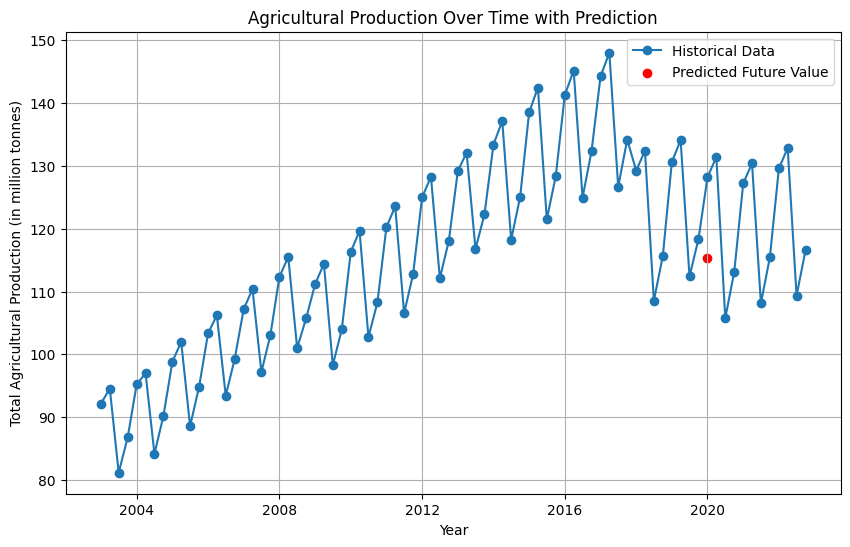

In [97]:
agriculture_predictor = RegressionPredictor(file='Datasets/Agriculture/Agriculture_sector.csv')
agriculture_predictor.plot_data_with_prediction(target_index=0)

## Return list of files in folder

In [152]:
import os

def list_files_without_extensions(folder_path):
    file_names = []
    for filename in os.listdir(folder_path):
        # Check if the path is a file (not a directory)
        if os.path.isfile(os.path.join(folder_path, filename)):
            # Split the filename and extension
            name, extension = os.path.splitext(filename)
            # Add the name (without extension) to the list
            file_names.append(name)
    return file_names

# Specify the folder path
folder_path = 'Datasets/Service'

# Get the list of file names without extensions
file_names_without_extensions = list_files_without_extensions(folder_path)

file_names_without_extensions


['BPO', 'Information technology', 'Retail', 'Telecommunications', 'Tourism']

## Example: 'Q1 2003', '2003 Q2', 'Q1-2003'

In [136]:
import os
import pandas as pd

def convert_date_format(csv_path):
    # Load the CSV file
    df = pd.read_csv(csv_path)

    # Assuming the date column is named 'Date', modify the column to the desired format
    df[df.columns[0]] = df[df.columns[0]].apply(parse_and_convert_date)

    # Save the modified DataFrame back to the CSV file
    df.to_csv(csv_path, index=False)

def parse_and_convert_date(date_str):
    # Add more parsing logic if needed
    # Here, we assume that the date string contains a quarter and a year


    parts = date_str.replace('-', ' ').split()
    len_part1 = len(parts[0])
    len_part2 = len(parts[1])
    year = ""
    quarter = ""
    if len_part1>len_part2:
        year = parts[0]
        quarter = parts[1]
    else:
        year = parts[1]
        quarter = parts[0]
        
    formatted_date = f'{year}-{quarter}'

    return formatted_date

# Specify the folder path containing your CSV files
folder_path = 'Datasets/Manufacturing'

# Iterate through each CSV file in the folder and convert the date format
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        csv_path = os.path.join(folder_path, filename)
        convert_date_format(csv_path)
